## main.py

1. import all necessary modules

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.preprocessing import image
from imblearn.over_sampling import SMOTE

sys.path.insert(0, os.path.abspath('./utils/'))
import util as utils

Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', 
                  metrics=['acc'])
    
    return model

In [3]:
dataset_dir = os.path.abspath('./dataset/')

train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

In [4]:
train_files = [ os.path.splitext(file)[0] for file in os.listdir(train_dir) ]
validation_files = [ os.path.splitext(file)[0] for file in os.listdir(validation_dir) ]
test_files = [ os.path.splitext(file)[0] for file in os.listdir(test_dir) ]

In [5]:
data_labels = { filename: label for filename, label in pd.read_csv('./trainLabels.csv').get_values() }

In [6]:
train_labels = [ data_labels.get(filename, filename) for filename in train_files ]
validation_labels = [ data_labels.get(filename, filename) for filename in validation_files ]
test_labels = [ data_labels.get(filename, filename) for filename in test_files ]

In [8]:
def load_image_as_np(filename):
    try:
        img = image.load_img(filename, grayscale=True)
        return np.atleast_3d(img)
    except Exception as error:
        logging.error(traceback.format_exc())

In [9]:
train_set = [ load_image_as_np(os.path.join(train_dir, (filename+'.png'))) for filename in train_files ]
validation_set = [ load_image_as_np(os.path.join(validation_dir, (filename+'.png'))) for filename in validation_files ]
test_set = [ load_image_as_np(os.path.join(test_dir, (filename+'.png'))) for filename in test_files ]

In [10]:
train_labels = [ (i - 1) for i in train_labels ]
validation_labels = [ (i - 1) for i in validation_labels ]
test_labels = [ (i - 1) for i in test_labels ]

In [11]:
train_set = np.asarray(train_set)
validation_set = np.asarray(validation_set)
test_set = np.asarray(test_set)

In [12]:
train_set = train_set.astype('float32') / 255
validation_set = validation_set.astype('float32') / 255
test_set = test_set.astype('float32') / 255

In [13]:
print('train_set.shape:       ', train_set.shape)
print('validation_set.shape:  ', validation_set.shape)
print('test_set.shape:        ', test_set.shape)

train_set.shape:        (4352, 128, 128, 1)
validation_set.shape:   (3258, 128, 128, 1)
test_set.shape:         (3258, 128, 128, 1)


In [14]:
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [15]:
model = get_model()

In [16]:
history = model.fit(train_set, train_labels, batch_size=64, epochs=10, validation_data=(validation_set, validation_labels))

Train on 4352 samples, validate on 3258 samples
Epoch 1/10
4352/4352 [==============================] - 6s - loss: 1.0972 - acc: 0.6321 - val_loss: 1.1978 - val_acc: 0.6449
Epoch 2/10
4352/4352 [==============================] - 2s - loss: 0.5911 - acc: 0.7989 - val_loss: 0.4931 - val_acc: 0.8413
Epoch 3/10
4352/4352 [==============================] - 2s - loss: 0.4599 - acc: 0.8550 - val_loss: 0.5096 - val_acc: 0.8432
Epoch 4/10
4352/4352 [==============================] - 2s - loss: 0.3746 - acc: 0.8934 - val_loss: 0.3775 - val_acc: 0.8947
Epoch 5/10
4352/4352 [==============================] - 2s - loss: 0.3015 - acc: 0.9173 - val_loss: 0.3611 - val_acc: 0.9205
Epoch 6/10
4352/4352 [==============================] - 2s - loss: 0.2692 - acc: 0.9246 - val_loss: 0.2949 - val_acc: 0.9322
Epoch 7/10
4352/4352 [==============================] - 2s - loss: 0.2232 - acc: 0.9377 - val_loss: 0.3003 - val_acc: 0.9359
Epoch 8/10
4352/4352 [==============================] - 2s - loss: 0.2030 - a

<Figure size 432x288 with 0 Axes>

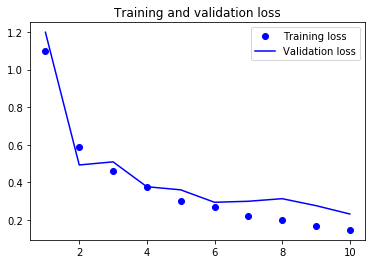

<Figure size 432x288 with 0 Axes>

In [20]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.figure()

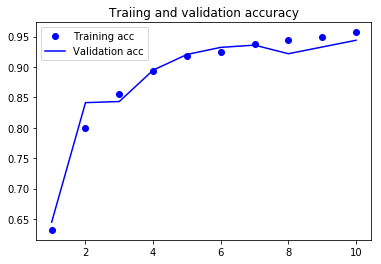

In [21]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traiing and validation accuracy')
plt.legend()
plt.show()

In [22]:
sm = SMOTE()

In [23]:
train_set_res, train_labels_res = sm.fit_resample(train_set.reshape(train_set.shape[0], (128 * 128 * 1)), train_labels)

In [24]:
train_set_res = train_set_res.reshape((train_set_res.shape[0], 128, 128, 1))

In [25]:
print('train_set_res.shape:     ', train_set_res.shape)
print('train_labels_res.shape:  ', train_labels_res.shape)

train_set_res.shape:      (11088, 128, 128, 1)
train_labels_res.shape:   (11088, 9)


In [31]:
model2 = get_model()

In [32]:
history2 = model2.fit(train_set_res, train_labels_res, batch_size=64, epochs=10, validation_data=(validation_set, validation_labels))

Train on 11088 samples, validate on 3258 samples
Epoch 1/10
11088/11088 [==============================] - 6s - loss: 0.9196 - acc: 0.6923 - val_loss: 0.7867 - val_acc: 0.7655
Epoch 2/10
11088/11088 [==============================] - 6s - loss: 0.4064 - acc: 0.8829 - val_loss: 0.8376 - val_acc: 0.7587
Epoch 3/10
11088/11088 [==============================] - 6s - loss: 0.2622 - acc: 0.9270 - val_loss: 0.3755 - val_acc: 0.9073
Epoch 4/10
11088/11088 [==============================] - 6s - loss: 0.1899 - acc: 0.9447 - val_loss: 0.2810 - val_acc: 0.9392
Epoch 5/10
11088/11088 [==============================] - 6s - loss: 0.1442 - acc: 0.9601 - val_loss: 0.4330 - val_acc: 0.9021
Epoch 6/10
11088/11088 [==============================] - 6s - loss: 0.1145 - acc: 0.9661 - val_loss: 0.3117 - val_acc: 0.9380
Epoch 7/10
11088/11088 [==============================] - 6s - loss: 0.0914 - acc: 0.9726 - val_loss: 0.3872 - val_acc: 0.9150
Epoch 8/10
11088/11088 [==============================] - 6s -

In [33]:
metrics2 = pd.Series(history2.history)

In [35]:
epochs2 = range(1, len(metrics2.acc) + 1)

<Figure size 432x288 with 0 Axes>

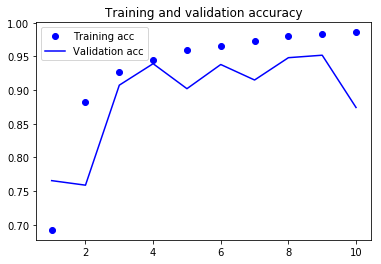

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, metrics2.acc, 'bo', label='Training acc')
plt.plot(epochs, metrics2.val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

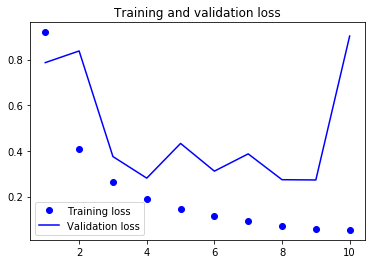

In [39]:
plt.plot(epochs, metrics2.loss, 'bo', label='Training loss')
plt.plot(epochs, metrics2.val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()